<a href="https://colab.research.google.com/github/abdelilah-abdel/Deeplearning_projects/blob/main/GradienDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importer les librairies**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

**Télécharger des données depuis votre disque local**

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving insurance_data.csv to insurance_data (1).csv


**Importer le fichier dans un DataFrame Pandas**

In [12]:
import io
data = pd.read_csv(io.BytesIO(data_to_load['insurance_data (1).csv']))

In [13]:
data

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [24]:
from keras.models import Sequential
model = Sequential()

In [25]:
from keras.layers import Dense
model.add(Dense(1, input_dim = 2, activation ='sigmoid', kernel_initializer='ones', bias_initializer='zeros'))

In [31]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

**Séparer le dataset en training data et test data**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['age','affordibility']],data.bought_insurance,test_size=0.2, random_state=25)

**Preprocessing: normalisation des données**

In [36]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [37]:
model_history = model.fit(X_train_scaled, y_train, batch_size=22,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 465ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7050 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6878 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6828 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6780 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6692 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6652 - accuracy: 0.5455
Epoch 11/2000


In [40]:
y_pred = model.predict(X_test_scaled)
y_pred

1/1 [==============================] - 0s 101ms/step


array([[0.7086074 ],
       [0.34256074],
       [0.15537994],
       [0.46986532],
       [0.73004943],
       [0.8364894 ]], dtype=float32)

In [39]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 315ms/step - loss: 0.3434 - accuracy: 1.0000


[0.3434222638607025, 1.0]

In [41]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [ True]])

In [44]:
from keras.src.metrics.accuracy_metrics import accuracy
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[3 0]
 [0 3]]
the accurcy ==>  <function accuracy at 0x7fb02df1b490>


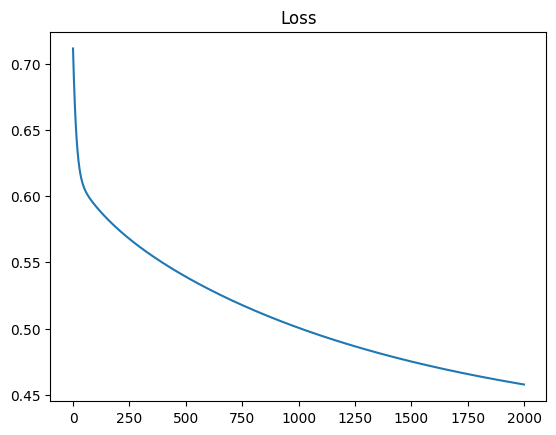

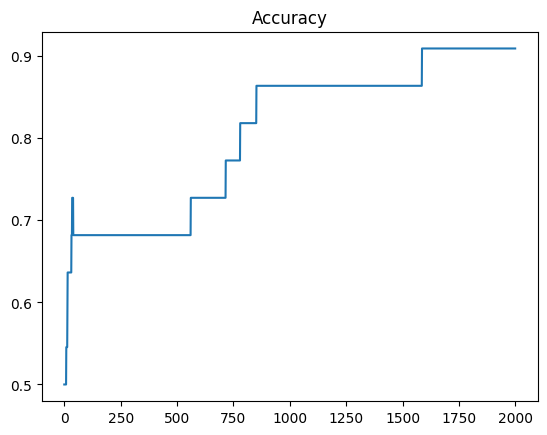

In [45]:
loss_curve = model_history.history['loss']
acc_curve = model_history.history['accuracy']

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()

**La fonction d'activation sigmoide**

In [ ]:
def sigmoid_numpy(X):
  import math
  return 1/(1+np.exp(-X))

**La fonction d'erreur log loss**

In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

**Algorithme de la descente de gradient (batch gradient descent)**

In [ ]:
def gradient_descent(age, affordability, y_true, epochs):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    cost_list = []
    epoch_list = []
    for i in range(epochs):

        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
        bias_d = np.mean(y_predicted-y_true)


        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')


        if i%10==0:
            cost_list.append(loss)
            epoch_list.append(i)

    return w1, w2, bias, loss, cost_list, epoch_list

In [ ]:
w1, w2, bias, loss, cost_list, epoch_list = gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000)

In [ ]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epoch_list,cost_list)